# **Importing Libraries**

In [ ]:
from tensorflow .keras import datasets,layers,models #tensorflow holds ML &DL models
import matplotlib.pyplot as plt
import numpy as np

# **Load & Split**

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.fashion_mnist.load_data() #Load dataset , dataset is already split into training and testing

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_train[:10] #1-D array ,Therefor no need to reshape

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
Classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
def plot_img(x,y,i):#plotting image with correct class Label
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.imshow(x[i],cmap='gray')
  plt.xlabel(Classes[y[i]])

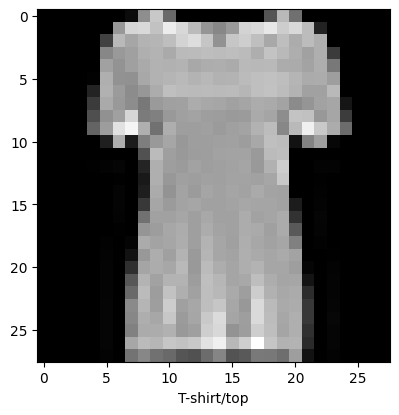

In [ ]:
plot_img(x_train,y_train,10)

# **Normalizing X-Test , X-Train**

In [ ]:
x_train_norm=x_train/255
x_test_norm=x_test/255

# **Convolutional Neural Network**

In [ ]:
#Creating a CNN
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),#converts to 1-D array
    layers.Dense(64,activation='relu'), #converts from 50000 to 64
    layers.Dense(10,activation='softmax') #converts from 64 to 10---> ten classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compiling
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(x_train_norm,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.7616 - loss: 0.6745
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.8809 - loss: 0.3314
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9000 - loss: 0.2790
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9104 - loss: 0.2434
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9189 - loss: 0.2212
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9265 - loss: 0.1977
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9343 - loss: 0.1767
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9423 - loss: 0.1566
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9456 - loss: 0.1439
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9502 - loss: 0.1319


In [ ]:
cnn.evaluate(x_test_norm,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9102 - loss: 0.2833


[0.28188419342041016, 0.9110000133514404]

# **Artificial Neural Network**

In [ ]:
#creating ANN
ann=models.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(x_train_norm,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 138s 73ms/step - accuracy: 0.7870 - loss: 0.5910
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 136s 73ms/step - accuracy: 0.8676 - loss: 0.3624
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 136s 73ms/step - accuracy: 0.8803 - loss: 0.3219
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 132s 70ms/step - accuracy: 0.8896 - loss: 0.2957
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 131s 70ms/step - accuracy: 0.8952 - loss: 0.2784
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 69ms/step - accuracy: 0.8959 - loss: 0.2676
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 135s 66ms/step - accuracy: 0.9057 - loss: 0.2476
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 65ms/step - accuracy: 0.9123 - loss: 0.2339
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.9126 - loss: 0.2266
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 65ms/step - accuracy: 0.9179 - loss: 0.2153


In [ ]:
ann.evaluate(x_test_norm,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8876 - loss: 0.3412


[0.34241870045661926, 0.8888999819755554]

# **Conclusion**
***CNN***

1.   Training Accuracy = 95%
2.   Testing = 91%

***ANN***

1.   Training Accuracy = 91%
2.   Testing = 88.7%





NOTE: Overfitting takes place under the following condtions:

*    training Accuracy > Testing Accuracy
*    GAP>=10


Therefor,CNN is a better model as it has a higher accuracy on both training and testing sets. yet neither of models faced overfitting issue.


